# Multi-modal and Multi-Task Learning (MTL) Overview  

## To do
Explain evaluation process, Bland Altman (Mostly done)

Section of visualization and the history of applications (In progress)

Theory, very technical, why does it prevent overfitting & regularization (Very sparse)

Separate Loss Function, talk about it?

Transfer Learning - Relate History

# Why Multi Task
Multi task learning helps in scenarios where there is a lot of general data, but very limited data for each class.
The example used in this notebook is predicting student test scores.
There are many students across the country and the data from each of them can be used to train a shared model.

However, only a handful of samples (~150) are available for each school.
Each school has distinct behavior in students that influences which factors are strong predictors of test scores.
By treating all students as part of the sam data set, we make it difficult for the model to adjust itself to the nuances of each school.

We can combat this by creating an artificial partition in the dataset on the school and giving each school a specific part of the model.
Situations such as these are where multi task learning is useful.

# Preface

##### A Common Source of Confusion

To aid in processing mutli-task learning for the first time it is helpful to reiterate the distinction between targets and tasks.
These two are *not* the same.
When switching from a traditional ML model to a multi-task model, it is still important to note that the target of the model is still to predict test scores.
The tasks are not pieces of output, but categories of data.

In summary: 
- Task: a breakpoint in the dataset that could be helpful to impart on the model before beginning training
- Target: the attribute the model is attempting to predict (same as traditional ML)

# MTL Summary
In Machine Learning, our traditional goal is to optimize for a specific target. 
We do this by training a model and refining it until the performance improvement flatlines. 
All of the data is processed in the same way.
By treating all the data as identical, we tend to leave out other pieces of potentially valuable information that could improve our score. 
In order to fix this, we present a Multi-Task Learning (MTL) approach.

MTL has been succesfully implemented and achieved increasingly better results than its single-task rival. Ranging from applications such as natural language processing (Collobert and Watson, 2008) to drug discovery (Ramsundar, et al., 2015), it has been shown to optimize most architectures if the dataset fits the situation. Although it is also known as joint learning, typically as soon as you start optimizing more than one loss function concurrently, you are considering to be multi-tasking. To give a more concise definition:

“MTL improves generalization by leveraging the domain-specific information contained in the training signals of related tasks". - [Caruana, 1998]

<img src="images/multi-task-graph.png" width="400">

An advantage to this type of model, is that while some of the hidden layers are shared among the data, they each have their own individual output layers, which greatly reduces the risk of overfitting. This is due to the model having a lot more data to learn from than it normally would.

By presenting a model with similar data but different goals, such as predicting scores of different schools around a country, we can make our overall performance better for our original task. Due to the split of data needed to train a multi-task model, one typically needs a very large, complete, and even dataset to train/test with.

## Multi Task Applications

In terms of specific applications, we will go down a history and talk about the ones we mentioned before:

NLP - Collobert and Watson 2008
Speech Recognition - Deng et al., 2013
Computer Vision - Girshick, 2015
Drug Discovery - Ramsundar et al., 2015 

https://arxiv.org/pdf/1707.08114.pdf
https://arxiv.org/pdf/1707.08114.pdf






## So why does MTL work?

### Implicit data augmentation
By having more than one task to train a model with, we passively acquire more data that has different noise patterns. For example, instead of overfitting on a single task A, we are able to learn with similar yet fundamentaly different task B, thus creating a more diverse and general representation.

### Attention focusing
If a task has a high amount of noise or the data is insufficient, a model can have issues solving which features are more relevent that others. However, with an MTL approach, features become easier to differentiate in terms of importance as the multitude of tasks will increase the amount of data available to test on.

### Eavesdropping
Similar to how some people are better at different individual tasks, so are models. Due to MTL, different models are able to "eavesdrop" on each other with shared layer, and spread the benefits of each to one another.

### Representation bias
MTL tends to prefer representations that the other tasks also focus on. This way, the model is better at generalizing new added tasks in the future and perform well on them if they are part of the same enviroment.

### Regularization
MTL acts as a passive regularizer by having an inductive bias (set of assumptions the learner uses to predict outputs), thus reducing the potential for overfitting and the overall Rademacher complexity of the model (the ability of it to fit random noise).


## Evaluation Success: Bland-Altman plots
In order to evauluate our results, we will be using a Bland-Altman (Tukey mean-difference plot) graph to measure the agreeableness between the actual target values and our predicted target values. 

<img src="images/bland-altman.png" width="600">

Given two sets of data of n samples each, you plot them on a graph with the following equation:

$$S(x, y) = ( \dfrac{S_1 + S_2}{2} , S_1 - S_2 )$$

Your x-axis will be the mean of the numbers, and the y-axis will be the difference. The three lines on the graph represent the the mean +/- 2 Standard Deviations, creating a 95% confidence interval centered around our mean error.

The reason this graph is useful is because it helps mitigate errors from concluding that two pieces of data correlate with each other based solely on the correlation coefficient (least square fitting). Back in 1986, Bland and Altman showed that two sets of data can have a high correlation but not be in agreement at all. Plotting the data as a function of the mean vs the difference has proven a more accurate way to determine if two sets of data agree with each other, not just correlate. 

# School Data

## School Data Understanding

We will be using a UK school dataset comprised of 140 different school locations with a total of 15,000 students. Each student has 28 different features, each representing a demographic aspect (gender, age, etc).

To give a more detailed explanation of the data, this was taken from the data source itself:

Column    Description              Coding

     1         Year                     1985=1; 1986=2; 1987=3

     2-4       School                   Codes 1-139

     5-6       Exam Score               Numeric score

     7-8       % FSM                    Percent. students eligible for free
                                        school meals

     9-10      % VR1 band               Percent. students in school in VR band
                                        1

     11        Gender                   Male=0; Female=1

     12        VR band of student       VR1=2; VR2=3; VR3=1

     13-14     Ethnic group of          ESWI=1*; African=2; Arab=3;
               student                  Bangladeshi=4; Caribbean=5;
                                        Greek=6;Indian=7;Pakistani=8;
                                        S.E.Asian=9;Turkish=10; Other=11

                                        Mixed=1; Male=2; Female=3
     15        School gender
                                        Maintained=1; Church of
     16        School denomination      England=2; Roman Catholic=3

Originally there were only 16 features, but the categorical ones were replace with a binary feature for each possible value. In total, there were 27 plus the bias term. Each school is treated as an individual task and the exam score is the target.

In this notebooke will be exploring three different ways to create a classifier and compare their performances.
In the next few sections, we will be showing three different methods of completing the task on this data: 1) running each school through its own model, 2) running all the schools together into one model, 3) using a Multi-Task approach and having some of the layers shared by each school, and some individual.

## School Data Processing

Unfortunately this is an extremely messy dataset so we have quite a bit of preprocessing that we will need to perform.

In [1]:
%matplotlib inline
import scipy.io
from sklearn.datasets.base import Bunch
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# load the data for each individual school
school_indices = [scipy.io.loadmat('data/school_splits/school_%d_indexes.mat' % (x)) for x in range(1, 11)]
raw_data = scipy.io.loadmat('data/school_splits/school_b.mat')

In [2]:
# changed data to float because yhat will be floats
X = np.array(raw_data['x'].T)
y = np.array(raw_data['y'])
print("We have an input array of shape:", X.shape)
print("We have an output array of shape:", y.shape)

We have an input array of shape: (15362, 28)
We have an output array of shape: (15362, 1)


In [3]:
# Matlab - arrays are indexed at 1, needs adapting
start_index = np.ravel(raw_data["task_indexes"] - 1)

In [4]:
tasks = []
for i in range(len(start_index)):
    start = start_index[i]
    if i == len(start_index) - 1:
        end = -1
    else:
        end = start_index[i + 1]
    descr = "School data: school {}".format(i + 1)
    id = "School {}".format(i + 1)
    tasks.append(Bunch(data=X[start:end],
                       target=y[start:end],
                       DESCR=descr,
                       ID=id))

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def bland_altman_plot(data1, data2, std1, std2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference
    std1      = np.asarray(std1)
    std2      = np.asarray(std2)

    plt.scatter(mean, diff, s=10+(std1 * std2), *args, **kwargs)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')

## Independent School Models

First, let's train each school on its own individual model.
Each of the 141 models will only have an average of 107.4 data points between both train and test data.

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense, Dropout, Activation, Flatten

/Users/yeti/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
models_ind = []
test_daters_ind = []
for x in tasks:
    #X_train = x.data
    #y_train = x.target
    X_train, X_test, y_train, y_test = train_test_split(x.data, x.target, test_size=0.2, random_state=42)

    mlp = Sequential()
    mlp.add(Dense(input_dim=X_train.shape[1], units=30, activation='relu'))
    mlp.add( Dense(units=15, activation='relu') )
    mlp.add(Dense(1))

    mlp.compile(loss='mean_squared_error',
                optimizer='rmsprop',
                metrics=[])
    
    mlp.fit(X_train, y_train, epochs=20, shuffle=True, verbose=0)
    models_ind.append(mlp)
    test_daters_ind.append([X_test, y_test])

In [8]:
import seaborn as sns
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, mean_squared_log_error

In [9]:
y_ind=[]
y_ind_std=[]
yhat_ind=[]
yhat_ind_std=[]
mses=[]

for t, mlp in zip(test_daters_ind, models_ind):
    X_test, y_test = t

    yhat_mlp = mlp.predict(X_test)
    yhat_rounded = np.around(yhat_mlp)
    
    y_test_plot = y_test.ravel()
    yhat_mlp_plot = yhat_mlp.ravel()
    
    y_ind.append(np.mean(y_test_plot))
    y_ind_std.append(np.std(y_test_plot))
    yhat_ind.append(np.mean(yhat_mlp_plot))
    yhat_ind_std.append(np.std(yhat_mlp_plot))

    mse = mean_squared_error(y_test, yhat_mlp)
    mses.append(mse)

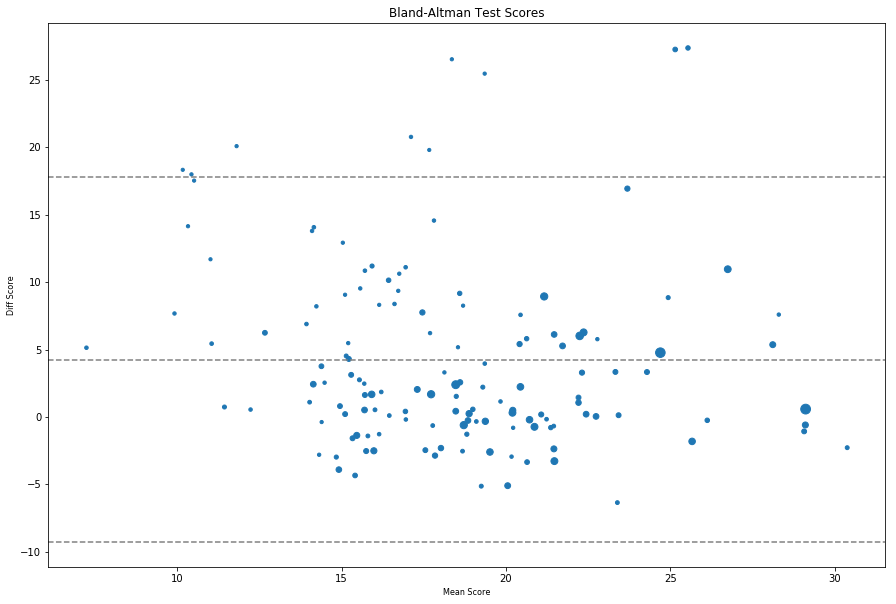

In [10]:
plt.figure(figsize=(15,10))
bland_altman_plot(y_ind, yhat_ind, y_ind_std, yhat_ind_std)
plt.title('Bland-Altman Test Scores')
plt.xlabel('Mean Score', fontsize=8)
plt.ylabel('Diff Score', fontsize=8)
plt.show()


This graph is a Bland Altman plot, indended to show the relationship between two sets of values by plotting the difference between them on the y-axis and the average of them on the x-axis. This way, you can see the residual difference between our predictions and the actual numbers. 
   
Each dot size represents its group standard deviation, the larger it is, the larger the STD is. In addition, each dot represents a different school, with each point being the average of all the points for that category.  

In [11]:
avg = float(np.mean(mses))
print ("Average of Mean Squared Error: ", avg)

Average of Mean Squared Error:  202.08546447753906


By using Avg Mean Square Error, we can see how close we are to the line of best fit. Based on the graph, we can already tell we are not close.

## General School Model

Let's see if using a single model for all the schools increases our accuracy.  We will have one model with all 15000 training instances.

In [12]:
all_data = {"data": [], "target": [], "data_test": [], "target_test": []}
for bunch in tasks:
    x_temp, y_temp = [bunch.data, bunch.target]
    X_train, X_test, y_train, y_test = train_test_split(x_temp, y_temp, test_size=0.2, random_state=42)
    all_data["data"].append(X_train)
    all_data["target"].append(y_train)        
    all_data["data_test"].append(X_test)
    all_data["target_test"].append(y_test)

X_train = np.concatenate(all_data["data"])
y_train = np.concatenate(all_data["target"])

In [13]:
generalized_mlp = Sequential()
generalized_mlp.add(Dense(input_dim=X_train.shape[1], units=30, activation='relu'))
generalized_mlp.add(Dense(units=15, activation='relu'))
generalized_mlp.add(Dense(1))

generalized_mlp.compile(loss='mean_squared_error',
            optimizer='rmsprop',
            metrics=[])

generalized_mlp.fit(X_train, y_train, epochs=20, shuffle=True, verbose=0)

In [14]:
y_general=[]
y_general_std=[]
yhat_general=[]
yhat_general_std=[]
mses_general=[]

for X_test, y_test in zip(all_data["data_test"], all_data["target_test"]):
    yhat_mlp = generalized_mlp.predict(X_test)
    yhat_rounded = np.around(yhat_mlp)
    
    y_test_plot = y_test.ravel()
    yhat_mlp_plot = yhat_mlp.ravel()
    
    y_general.append(np.mean(y_test_plot))
    y_general_std.append(np.std(y_test_plot))
    yhat_general.append(np.mean(yhat_mlp_plot))
    yhat_general_std.append(np.std(y_test_plot))
    
    mse = mean_squared_error(y_test, yhat_mlp)
    mses_general.append(mse)

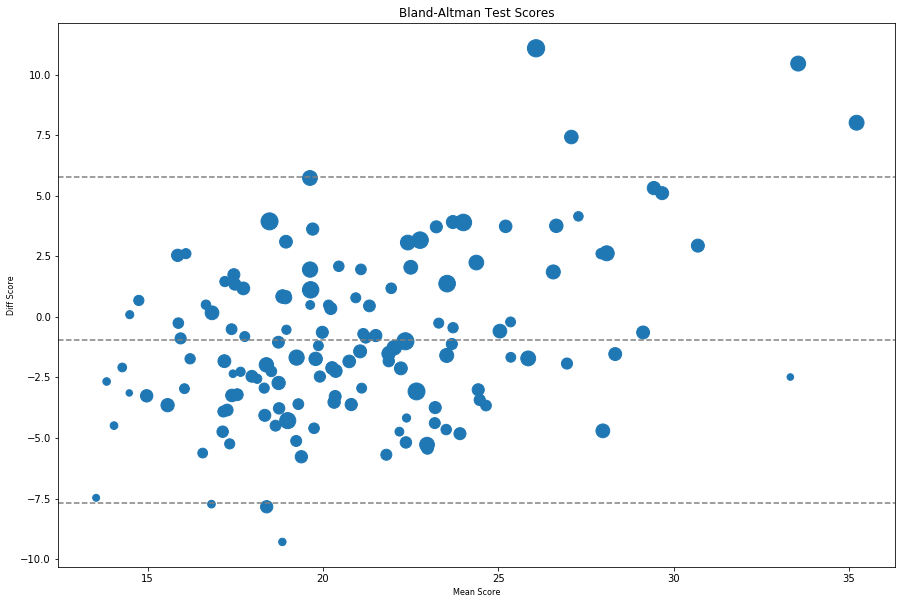

In [15]:
plt.figure(figsize=(15,10))
bland_altman_plot(y_general, yhat_general, y_general_std, yhat_general_std)
plt.title('Bland-Altman Test Scores')
plt.xlabel('Mean Score', fontsize=8)
plt.ylabel('Diff Score', fontsize=8)
plt.show()

In [16]:
avg = float(np.mean(mses_general))
print ("Average of Mean Squared Error: ", avg)

Average of Mean Squared Error:  107.19197845458984


Our Avg Mean Squared Error is significantly better, clearly showing better results, although we still have an issue of underpredicting at higher test scores.

## School Multi-Task Model

### mean_squared_error

In [17]:
from keras.layers import Input, Dense
from keras.models import Model

inputs = Input(shape=(X[0].shape[0],))
shared_mlp = Dense(64, activation='relu')(inputs)
shared_mlp = Dense(64, activation='relu')(shared_mlp)

models_mtl = []

for _ in range(len(tasks)):
    personal_layer = Dense(10, activation='relu')(shared_mlp)
    output_layer = Dense(1)(personal_layer)
    model = Model(inputs=inputs, outputs=output_layer)
    model.compile(optimizer='rmsprop', loss='mean_squared_error')
    models_mtl.append(model)

In [18]:
all_data = []
all_test = []

weights = {}
for bunch in tasks:
    ID = int(bunch.ID.split(" ")[-1]) - 1
    X_train, X_test, y_train, y_test = train_test_split(bunch.data, bunch.target, test_size=0.4, random_state=42)
    for row, target in zip(X_train, y_train):
        instance = {}
        instance["data"] = row.reshape((1, 28))
        instance["school"] = ID
        instance["target"] = target
        all_data.append(instance)
        
    for row, target in zip(X_test, y_test):
        instance = {}
        instance["data"] = row.reshape((1, 28))
        instance["school"] = ID
        instance["target"] = target
        all_test.append(instance)

After separating the data correctly, shuffle it all back together and run it through 20 epochs on the shared model.

In [ ]:
import random
random.shuffle(all_data)

In [ ]:
EPOCHS = 10
for _underscore in range(10):
    for instance in all_data:
        models_mtl[instance["school"]].train_on_batch(instance["data"], instance["target"])

In [ ]:
school_y = [ [] for x in range(139)]
school_yhat = [ [] for x in range(139)]

for test in all_test:
    X_test = test["data"]
    y_test = test["target"]
    
    mlp = models_mtl[test["school"]]
    
    yhat_mlp = mlp.predict(X_test)
    yhat_rounded = np.around(yhat_mlp)
    
    y_test_plot = y_test.ravel()
    yhat_mlp_plot = yhat_mlp.ravel()

    school_y[test["school"]].append(y_test_plot)
    school_yhat[test["school"]].append(yhat_mlp_plot)

In [ ]:
y_mtl=[]
y_mtl_std=[]
yhat_mtl=[]
yhat_mtl_std=[]
mses_mtl=[]

plt.figure(figsize=(15,10))

for x, y in zip(school_y, school_yhat):
    y_mtl.append(np.mean(x))
    y_mtl_std.append(np.std(x))
    yhat_mtl.append(np.mean(y))
    yhat_mtl_std.append(np.std(y))
    
    mse = mean_squared_error(x, y)
    mses_mtl.append(mse)
    
bland_altman_plot(y_mtl, yhat_mtl, y_mtl_std, yhat_mtl_std)
plt.title('Bland-Altman Test Scores')
plt.xlabel('Mean Score', fontsize=8)
plt.ylabel('Diff Score', fontsize=8)
plt.show()

In [ ]:
avg = float(np.mean(mses_mtl))
print ("Average of Mean Squared Error: ", avg)

### mean_absolute_error

In [ ]:
from sklearn.metrics import mean_absolute_error

inputs = Input(shape=(X[0].shape[0],))
shared_mlp = Dense(64, activation='relu')(inputs)
shared_mlp = Dense(64, activation='relu')(shared_mlp)

models_mtl = []

for _ in range(len(tasks)):
    personal_layer = Dense(10, activation='relu')(shared_mlp)
    output_layer = Dense(1)(personal_layer)
    model = Model(inputs=inputs, outputs=output_layer)
    model.compile(optimizer='rmsprop', loss='mean_absolute_error')
    models_mtl.append(model)

In [ ]:
all_data = []
all_test = []

weights = {}
for bunch in tasks:
    ID = int(bunch.ID.split(" ")[-1]) - 1
    X_train, X_test, y_train, y_test = train_test_split(bunch.data, bunch.target, test_size=0.4, random_state=42)
    for row, target in zip(X_train, y_train):
        instance = {}
        instance["data"] = row.reshape((1, 28))
        instance["school"] = ID
        instance["target"] = target
        all_data.append(instance)
        
    for row, target in zip(X_test, y_test):
        instance = {}
        instance["data"] = row.reshape((1, 28))
        instance["school"] = ID
        instance["target"] = target
        all_test.append(instance)

In [ ]:
import random
random.shuffle(all_data)

In [ ]:
EPOCHS = 10
for _underscore in range(10):
    for instance in all_data:
        models_mtl[instance["school"]].train_on_batch(instance["data"], instance["target"])

In [ ]:
school_ya = [ [] for x in range(139)]
school_yhata = [ [] for x in range(139)]

for test in all_test:
    X_test = test["data"]
    y_test = test["target"]
    
    mlp = models_mtl[test["school"]]
    
    yhat_mlp = mlp.predict(X_test)
    yhat_rounded = np.around(yhat_mlp)
    
    y_test_plot = y_test.ravel()
    yhat_mlp_plot = yhat_mlp.ravel()

    school_ya[test["school"]].append(y_test_plot)
    school_yhata[test["school"]].append(yhat_mlp_plot)

In [ ]:
y_mtla=[]
y_mtl_stda=[]
yhat_mtla=[]
yhat_mtl_stda=[]
maes_mtl=[]

plt.figure(figsize=(15,10))

for x, y in zip(school_ya, school_yhata):
    y_mtla.append(np.mean(x))
    y_mtl_stda.append(np.std(x))
    yhat_mtla.append(np.mean(y))
    yhat_mtl_stda.append(np.std(y))
    
    mae = mean_absolute_error(x, y)
    maes_mtl.append(mse)
    
bland_altman_plot(y_mtla, yhat_mtla, y_mtl_stda, yhat_mtl_stda)
plt.title('Bland-Altman Test Scores')
plt.xlabel('Mean Score', fontsize=8)
plt.ylabel('Diff Score', fontsize=8)
plt.show()

In [ ]:
avg = float(np.mean(maes_mtl))
print ("Average of Mean Absolute Error: ", avg)

So the results were a bit dissapointing. It turns out the General Model proved best for this problem, but that could be due to a variety of reasons, such as lack of data or a poorly built Multi-Task model. However, it should be noted that while the Avg Mean Squared Error is higher, the graph shows that the problem of overfitting to low test scores is less in the Multi-Task Model than the other previous two. So while it did score a higher error value, it did prove better on solving the overfitting problem.

Now we will move on to an example that best shows how a Multi Task model can be extremely effective.

# Computer Survey Data

### Computer Survey Data Understanding
This data set was obtained on pmtkdata project's web site:
    https://code.google.com/p/pmtkdata/.
It was used by "Argyriou, Evgeniou, Pontil - Convex multi-task feature learning - ML 2008" and "Kumar, Daume III - Learning Task Grouping and Overlap in Multi-Task Learning - ICML 2012".

The data set's properties are:
   
20 samples (all subjects have the same samples)
13 features (describing computer's intrinsic (e.g. CPU speed, RAM) and extrinsic (e.g. Hot line support, Color of unit) features)
regression task of predicting subject's likelihood of purchasing a personal computer
   
Each data point is 20 x 14, which is each of the computers for that respective student. The computers are the students and the students are the school while the ratings are the test scores and the comp specs are the demographs.

In [ ]:
%matplotlib inline
import os.path
import scipy.io
from sklearn.datasets.base import Bunch
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

def load_computer_survey_data():
    """
    Returns
    -------
    tasks -- list
        A list of Bunch objects that correspond to regression tasks, each task
        corresponding to one subject.
    """
    
    #matlab_file = os.path.join("data/data/computer/conjointAnalysisComputerBuyers.mat")
    mat = scipy.io.loadmat("data/computer_survey/conjointAnalysisComputerBuyers.mat")
    # feature names are taken from the ComputerSurveyFull.xls file, Sheet named
    # Design Matrix
    feature_names = ["cnst", "Hot line", "RAM", "Screen size", "CPU speed",
                     "Hard disk", "CD ROM", "Cache", "Color of unit",
                     "Availability", "Warranty", "Software", "Guarantee",
                     "Price"]
    # extract X and combined y data
    X = mat["designMarix"].astype("float")
    y_combined = mat["likeBuy"].astype("float")
    # create a task for each subject
    tasks = []
    for subject in range(len(y_combined)):
        descr = "Computer Survey data: Subject {}".format(subject)
        id = "Subject {}".format(subject)
        y = np.array(y_combined[subject], copy=True)
        tasks.append(Bunch(data=X,
                           target=y.reshape(20, 1),
                           feature_names=feature_names,
                           DESCR=descr,
                           ID=id))
    return tasks

In [ ]:
comp_tasks = load_computer_survey_data()

## Individual Computer Model

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, mean_squared_log_error

In [ ]:
modelsc_ind = []
testc_daters_ind = []
for x in comp_tasks:
    X_train, X_test, y_train, y_test = train_test_split(x.data, x.target, test_size=0.25, random_state=42)

    mlp = Sequential()
    mlp.add(Dense(input_dim=X_train.shape[1], units=30, activation='relu'))
    mlp.add( Dense(units=15, activation='relu') )
    mlp.add(Dense(1))

    mlp.compile(loss='mean_squared_error',
                optimizer='rmsprop',
                metrics=[])
    
    mlp.fit(X_train, y_train, epochs=10, shuffle=True, verbose=0)
    modelsc_ind.append(mlp)
    testc_daters_ind.append([X_test, y_test])

In [ ]:
yc_ind=[]
yc_ind_std=[]
yhatc_ind=[]
yhatc_ind_std=[]
msesc=[]

for t, mlp in zip(testc_daters_ind, modelsc_ind):
    X_test, y_test = t

    yhat_mlp = mlp.predict(X_test)
    yhat_rounded = np.around(yhat_mlp)
    
    y_test_plot = y_test.ravel()
    yhat_mlp_plot = yhat_mlp.ravel()
    
    yc_ind.append(np.mean(y_test_plot))
    yc_ind_std.append(np.std(y_test_plot))
    yhatc_ind.append(np.mean(yhat_mlp_plot))
    yhatc_ind_std.append(np.std(yhat_mlp_plot))

    mse = mean_squared_error(y_test, yhat_mlp)
    msesc.append(mse)

In [ ]:
plt.figure(figsize=(15,10))
bland_altman_plot(yc_ind, yhatc_ind, yc_ind_std, yhatc_ind_std)
plt.title('Bland-Altman Test Scores')
plt.xlabel('Mean Score', fontsize=8)
plt.ylabel('Diff Score', fontsize=8)
plt.show()

In [ ]:
avg = float(np.mean(msesc))
print ("Average of Mean Squared Error: ", avg)

## General Computer Model

In [ ]:
all_comp_data = {"data": [], "target": [], "data_test": [], "target_test": []}
for bunch in comp_tasks:
    x_temp, y_temp = [bunch.data, bunch.target]
    X_train, X_test, y_train, y_test = train_test_split(x_temp, y_temp, test_size=0.25, random_state=42)
    all_comp_data["data"].append(X_train)
    all_comp_data["target"].append(y_train)        
    all_comp_data["data_test"].append(X_test)
    all_comp_data["target_test"].append(y_test)

X_train_comp = np.concatenate(all_comp_data["data"])
y_train_comp = np.concatenate(all_comp_data["target"]).reshape(2850, 1)

In [ ]:
generalizedc_mlp = Sequential()
generalizedc_mlp.add(Dense(input_dim=X_train_comp.shape[1], units=20, activation='relu'))
generalizedc_mlp.add(Dense(units=10, activation='relu'))
generalizedc_mlp.add(Dense(1))

generalizedc_mlp.compile(loss='mean_squared_error',
            optimizer='rmsprop',
            metrics=[])

generalizedc_mlp.fit(X_train_comp, y_train_comp, epochs=20, shuffle=True, verbose=0)

In [ ]:
yc_general=[]
yc_general_std=[]
yhatc_general=[]
yhatc_general_std=[]
msesc_general=[]

for X_test, y_test in zip(all_comp_data["data_test"], all_comp_data["target_test"]):
    yhat_mlp = generalizedc_mlp.predict(X_test)

    y_test_plot = y_test.ravel()
    yhat_mlp_plot = yhat_mlp.ravel()
    
    yc_general.append(np.mean(y_test_plot))
    yc_general_std.append(np.std(y_test_plot))
    yhatc_general.append(np.mean(yhat_mlp_plot))
    yhatc_general_std.append(np.std(yhat_mlp_plot))
    
    mse = mean_squared_error(y_test, yhat_mlp)
    msesc_general.append(mse)

In [ ]:
plt.figure(figsize=(15,10))
bland_altman_plot(yc_general, yhatc_general, yc_general_std, yhatc_general_std)
plt.title('Bland-Altman Test Scores')
plt.xlabel('Mean Score', fontsize=8)
plt.ylabel('Diff Score', fontsize=8)
plt.show()

In [ ]:
avg = float(np.mean(msesc_general))
print ("Average Mean Squared Error: ", avg)

## Computer Survey Multi-Task Model

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

inputs = Input(shape=(X_train_comp.shape[1],))
shared_mlp = Dense(64, activation='relu')(inputs)
shared_mlp = Dense(64, activation='relu')(shared_mlp)

models_mtl = []

for _ in range(len(comp_tasks)):
    personal_layer = Dense(10, activation='relu')(shared_mlp)
    output_layer = Dense(1)(personal_layer)
    model = Model(inputs=inputs, outputs=output_layer)
    model.compile(optimizer='rmsprop', loss='mean_squared_error')
    models_mtl.append(model)

In [ ]:
all_comp_data = []
all_comp_test = []

weights = {}
for bunch in comp_tasks:
    ID = int(bunch.ID.split(" ")[-1])
    X_train, X_test, y_train, y_test = train_test_split(bunch.data, bunch.target, test_size=0.25, random_state=42)
    for row, target in zip(X_train, y_train):
        instance = {}
        instance["data"] = row.reshape((1, 14))
        instance["subject"] = ID
        instance["target"] = target
        all_comp_data.append(instance)
        
    for row, target in zip(X_test, y_test):
        instance = {}
        instance["data"] = row.reshape((1, 14))
        instance["subject"] = ID
        instance["target"] = target
        all_comp_test.append(instance)

In [ ]:
import random
random.shuffle(all_comp_data)

In [ ]:
EPOCHS = 10
for _underscore in range(10):
    for instance in all_comp_data:
        models_mtl[instance["subject"]].train_on_batch(instance["data"], instance["target"])

In [ ]:
computer_ya = [ [] for x in range(190)]
computer_yhata = [ [] for x in range(190)]

for test in all_comp_test:
    X_test = test["data"]
    y_test = test["target"]
    
    mlp = models_mtl[test["subject"]]
    
    yhat_mlp = mlp.predict(X_test)
    
    y_test_plot = y_test.ravel()
    yhat_mlp_plot = yhat_mlp.ravel()

    computer_ya[test["subject"]].append(y_test_plot)
    computer_yhata[test["subject"]].append(yhat_mlp_plot)

In [ ]:
yc_mtl=[]
yc_mtl_std=[]
yhatc_mtl=[]
yhatc_mtl_std=[]
msesc_mtl=[]

plt.figure(figsize=(15,10))

for x, y in zip(computer_ya, computer_yhata):
    yc_mtl.append(np.mean(x))
    yc_mtl_std.append(np.std(x))
    yhatc_mtl.append(np.mean(y))
    yhatc_mtl_std.append(np.std(y))
    
    mse = mean_squared_error(x, y)
    msesc_mtl.append(mse)
    
bland_altman_plot(yc_mtl, yhatc_mtl, yc_mtl_std, yhatc_mtl_std)
plt.title('Bland-Altman Test Scores')
plt.xlabel('Mean Score', fontsize=8)
plt.ylabel('Diff Score', fontsize=8)
plt.show()

In [ ]:
avg = float(np.mean(msesc_mtl))
print ("Average of Mean Squared Error: ", avg)

# ChemBL

ChEMBL is an actively maintained and used chemical database of bioactive molecules with drug-like properties. The European Bioinformatics Institute (EBI) is in charge of keeping up to date with it. 


## ChemBL Data
The first part of the code is meant to take in the ChemBL molecules and transform them into a readable data set in order for us to use it with rdkit. 

TODO: Pray to Pavel that he will help us again.

In [ ]:
import pandas, numpy

def cleanUp(filename, BA='IC50', UNITS='nM'):
   # Read in the file.
   d = pandas.read_table(filename, sep=r',(?=(?:[^"]*"[^"]*")*[^"]*$)', engine='python')

   # Eliminate duplicates.
   #d =d.drop_duplicates(['ACTIVITY_ID'])

   # Retain only IC50 entries
   # (do not mess with the conversion -- like, from logIC50 or pIC50 to IC50 -- as the fraction of
   # those entries is negligible).
   d = d[d.STANDARD_TYPE==BA]

   # Restrict to exclusively human targets
   # (this will take care of unwanted 'Starlite ...' entries as well).
   #d = d[d.NAME.str.startswith('h')]

   # Retain only the nM entries.
   d = d[d.STANDARD_UNITS==UNITS]

   # Integerize the DOM_ID column (the COMPOUND_ID column type is already 'int').
   d.DOC_ID = d.DOC_ID.astype(int)

   # Delete idle columns.
   #d.drop([Column Name or list],inplace=True,axis=1)

   return d

def binarizeInteractions(d, MIN=100, MAX=10000):
   # Apply the interaction criterion.
   ci = d[((d.STANDARD_RELATION=='=') | (d.STANDARD_RELATION=='~') | (d.STANDARD_RELATION=='<') | (d.STANDARD_RELATION=='<=')) & (d.STANDARD_VALUE<=MIN)]
   # Apply the non-interaction criterion.
   no = d[((d.STANDARD_RELATION=='=') | (d.STANDARD_RELATION=='~') | (d.STANDARD_RELATION=='>') | (d.STANDARD_RELATION=='>>') | (d.STANDARD_RELATION=='>=')) & (d.STANDARD_VALUE>=MAX)]
   print("Look up how to suppress the warning message below.")
   ci.STANDARD_VALUE = 1
   no.STANDARD_VALUE = 0
   return pandas.concat([ci, no])

d = cleanUp("generated_data/molecules.csv")
cino = binarizeInteractions(d)
# Remove entries with less than 50 ligands per target.
cino = cino.groupby('MOLGREGNO').filter(lambda x: len(x) > 49)

dom_ID = numpy.unique( cino.DOC_ID.value_counts().index )
com_ID = numpy.unique( cino.RECORD_ID.value_counts().index )
print (com_ID.size, dom_ID.size)

# Initialize the target-compound matrix.
ma = pandas.DataFrame( numpy.nan*numpy.ones((com_ID.size, dom_ID.size)), columns=dom_ID, index=com_ID )
# Fill in the target-compound matrix and save it as a file.
for i, r in cino.iterrows():
   ma[r.DOC_ID][r.RECORD_ID] = r.STANDARD_VALUE
ma.to_csv("ChemBL/kinda_works.csv")

#d = pandas.read_csv('ChemBL/kinda_works.csv')
#d.columns = d.columns.astype(int)

In [ ]:
from __future__ import print_function

from rdkit import Chem
from rdkit.Chem import MACCSkeys, AllChem
from rdkit.Avalon import pyAvalonTools as fpAvalon
from rdkit.Chem.AtomPairs import Pairs, Torsions
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem.ChemicalFeatures import BuildFeatureFactory
from rdkit.Chem import rdMolDescriptors
import pandas as pd
import argparse
import textwrap
import getopt
from argparse import ArgumentParser
import time

def CalculateFP_mod(smiles, N_BITS=512):
    m = Chem.MolFromSmiles(smiles)
    if m is None:
        raise ValueError('SMILES cannot be converted to a RDKit molecules:', smiles)

    return AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=N_BITS)


if __name__ == "__main__":
    parser = ArgumentParser()

    parser.add_argument("-i", "--input", dest="ligandsWithSmiles", required=True,help="expected file containing 2 cols molregno,smiles", metavar="FILE")

    parser.add_argument("-s", "--size", dest="numBits", default=512,help="Size of fingerprints",metavar="NumBits")



    args = parser.parse_args()

    print ( "reading from file   %s" %(args.ligandsWithSmiles))

    ipFile = args.ligandsWithSmiles

    df = pd.read_csv(ipFile)



    numBits = int(args.numBits)
    count = 0
    errorCompounds = []



    current_milli_time = lambda: int(round(time.time() * 1000))

    opFile = "ChemBL/CompoundFingerPrints_%d_%s.csv"%(numBits,current_milli_time())

    print("Generating output file with fingerprints %s"%opFile)
    with open(opFile,"w") as fpFile :

        tempLine = ""

        tempLine ="molregno"
        for i in range(0,numBits):
            tempLine=tempLine+","+"Compound_"+str(i)
        fpFile.writelines(tempLine+"\n")

        tempLine = ""

        for row in df.iterrows():
            mol= row[1][0]
            smilesCode= row[1][1]

            try:
                count = count + 1
                tempLine = str(mol)

                temp = CalculateFP_mod(smilesCode)
                strFP = temp.ToBitString()

                for i in range(0,len(strFP)):
                    tempLine=tempLine+","+strFP[i]


                fpFile.writelines(tempLine+"\n")

                if count%100000 ==0 :
                    print(count)
            except :
                errorCompounds.append(mol)


    print("Generating error.log for failed compounds")
    with open("ChemBL/error.log","w") as fp :
        fp.write("Following compounds errored out \n")
        fp.write(str(errorCompounds))


# Multi-modal Summary
A multi-modal design can be defined as a system designed to fufill one task based on a variety of similar input. The reason for this design is due to the many advantages it offers in the right situations. For example, in the medical field, a doctor uses multiple image data (such as a CT, MRI, ultrasound, etc) in order to be able to diagnose a patient more effectively. 
   
There are a varierty of ways one can go about combining similar data together to be used. Early fusion is when the different data sources are combined together in the pre-processing phase through either PCA, ICA, or CCA and then presented to the machine learning algorithm to be processed. Later on, late fusion became the norm as ensemble classifiers became more and more popular. This method was typically easier and better to implement, especially if the different inputs varied significantly. However, recently, Deep Neural Network Architectures have paved a way for a third type, Indermediate fusion, a method of merging the modality throughout the many hidden layers and connecting the data on a very abstract, yet effective, level.
<img src="images/multi-modal-graph.png" width="700">

## References
Image #1: http://stanford.edu/~eadeli/

Image #2: http://ruder.io/multi-task/

Bland-Altman picture & info : https://en.wikipedia.org/wiki/Bland%E2%80%93Altman_plot

Source: https://keras.io/getting-started/functional-api-guide/#multi-input-and-multi-output-models

Bland Altman: https://en.wikipedia.org/wiki/Bland%E2%80%93Altman_plot

School Papers:

Overview of Multi-Task Learning: https://arxiv.org/pdf/1706.05098.pdf

Multi-modal Learning: https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8103116
   
2015 https://www.ijcai.org/Proceedings/15/Papers/512.pdf
   
2017 https://arxiv.org/pdf/1703.00977.pdf

2017 https://arxiv.org/pdf/1611.03427.pdf

data import: https://github.com/tjanez/PyMTL/blob/master/src/PyMTL/data.py